In [22]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import torchaudio.transforms as T

import os
import time
from audio_utils import print_stats, plot_waveform, plot_specgram, play_audio, plot_spectrogram
from dataloader_audio import AudioDataset, collate_fn
from tqdm.notebook import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"{device}: {torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else ''}, torch {torch.__version__}")

# data directories
train_data_path = 'data/audio'
train_label_path = 'data/label'
test_data_path = ''
test_label_path = ''

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cuda: NVIDIA GeForce RTX 3060 Laptop GPU, torch 1.9.1


## Dataset

In [28]:
transform = torch.nn.Sequential(
    T.MFCC(),
    # ToTensor()
    # T.LogMelSpec(sample_rate=sample_rate, n_mels=n_feats,  win_length=160, hop_length=80)
)
# transform = transform.to(device)

train_data = AudioDataset(train_data_path, train_label_path, transform)
test_data = AudioDataset(train_data_path, train_label_path, transform)

print(f'Train data: {len(train_data)}')
print(f'Test data: {len(test_data)}')

Train data: 3
Test data: 3


## DataLoader

In [29]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, collate_fn=collate_fn)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True, collate_fn=collate_fn)

#### One example

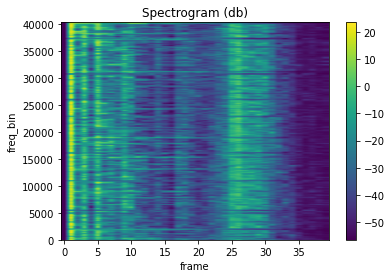

Train data shape: torch.Size([40270, 40])
Label: tensor([21, 24, 16,  ..., 16, 26,  5])


In [32]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
mfcc = train_features[0]
label = train_labels[0]

plot_spectrogram(mfcc)
print(f'Train data shape: {mfcc.shape}')
print(f"Label: {label}")

## Model

In [52]:
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)  # reduce the learning after 20 epochs by a factor of 10

## Train